#  Perform Clustering Kmeans for the crime data and identify the number of clusters formed and draw inferences.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
crime = pd.read_csv('C:/Users/ssair/datasets/crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime2=crime.drop(['Unnamed: 0'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# EDA

In [4]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [5]:
# Normalize heterogenous numerical data by using Standard Scaler
crime3=StandardScaler().fit_transform(crime2)

How to find optimum number of  cluster.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [6]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime3)
    wcss.append(kmeans.inertia_)

C:\Users\ssair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


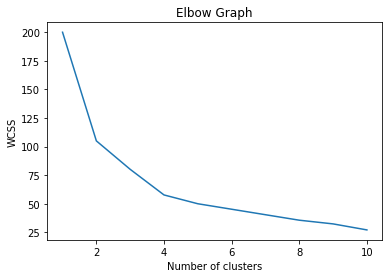

In [7]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# So, K = 3

In [8]:
clusters_3=KMeans(3,random_state=30).fit(crime3)
clusters_3

KMeans(n_clusters=3, random_state=30)

In [9]:
# labels of cluster is 
clusters_3.labels_

array([1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [10]:
# Assign clusters to the data set
crime4=crime2.copy()
crime4['clusters_3id']=clusters_3.labels_
crime4

,Murder,Assault,UrbanPop,Rape,clusters_3id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [11]:
# Compute the centroids for K=4 clusters with 11 variables
clusters_3.cluster_centers_

array([[-0.88515915, -1.0213324 , -0.94990286, -0.92016524],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [12]:
# Group data by Clusters (K=3)
crime4.groupby('clusters_3id').agg(['mean']).reset_index()

,clusters_3id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.971429,86.500,51.928571,12.70000
1,1,12.165000,255.250,68.400000,29.16500
2,2,5.656250,138.875,73.875000,18.78125


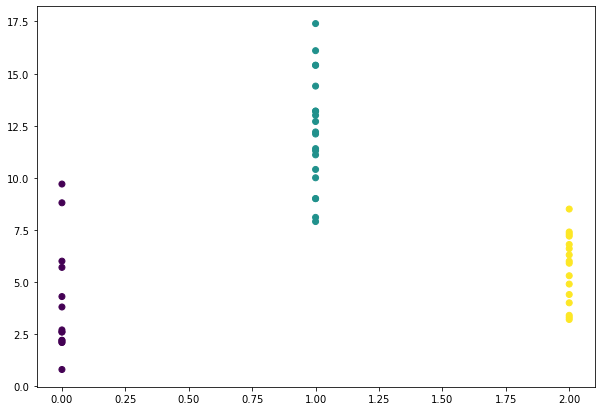

In [13]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime4['clusters_3id'],crime4['Murder'], c=clusters_3.labels_)

Note : we also able to build cluster using k = 4 